## Task 1: Perform in depth EDA (Exploratory Data Analysis) on the wallmart customer purchases dataset.

<table align="center">
  <td>
    <a href="https://colab.research.google.com/github/BUFONJOKER/ml-ds-internship/blob/master/Task1/eda_formatted.ipynb" target="_parent">
      <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"
      style="height:50px; width:auto;"/>
    </a>
  </td>
</table>


In [371]:
# import necassary libraries
import pandas as pd
import matplotlib.pyplot as plt
# for axis range formatting
import matplotlib.ticker as ticker
import seaborn as sns

In [372]:
# read the dataset and also make copy so
# original remains intact 
df_copy = pd.read_csv('Walmart_customer_purchases.csv')
df = df_copy.copy()

In [373]:
# take a look at the first few rows of the dataset
df.head()

,Customer_ID,Age,Gender,City,Category,Product_Name,Purchase_Date,Purchase_Amount,Payment_Method,Discount_Applied,Rating,Repeat_Customer
0,84607c1f-910c-44d5-b89f-e1ee06dd34c0,49,Female,New Cynthia,Electronics,Smartphone,2024-08-30,253.26,Cash on Delivery,No,1,Yes
1,f2a81712-a73e-4424-8b39-4c615a0bd4ea,36,Other,Cruzport,Clothing,T-Shirt,2024-12-21,73.19,Debit Card,Yes,1,No
2,da9be287-8b0e-4688-bccd-1a2cdd7567c6,52,Male,Jeffreytown,Beauty,Perfume,2024-12-26,125.62,Credit Card,Yes,1,No
3,50ec6932-3ac7-492f-9e55-4b148212f302,47,Female,Jenniferburgh,Electronics,Smartwatch,2024-11-04,450.32,Credit Card,No,2,Yes
4,8fdc3098-fc75-4b0f-983c-d8d8168c6362,43,Other,Kingshire,Electronics,Smartphone,2024-10-07,369.28,Credit Card,Yes,2,Yes


In [374]:
# check the data types of each column
df.dtypes

Customer_ID          object
Age                   int64
Gender               object
City                 object
Category             object
Product_Name         object
Purchase_Date        object
Purchase_Amount     float64
Payment_Method       object
Discount_Applied     object
Rating                int64
Repeat_Customer      object
dtype: object

In [375]:
# check the shape of the dataset
df.shape

(50000, 12)

In [376]:
# check for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Customer_ID       50000 non-null  object 
 1   Age               50000 non-null  int64  
 2   Gender            50000 non-null  object 
 3   City              50000 non-null  object 
 4   Category          50000 non-null  object 
 5   Product_Name      50000 non-null  object 
 6   Purchase_Date     50000 non-null  object 
 7   Purchase_Amount   50000 non-null  float64
 8   Payment_Method    50000 non-null  object 
 9   Discount_Applied  50000 non-null  object 
 10  Rating            50000 non-null  int64  
 11  Repeat_Customer   50000 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 4.6+ MB


In [377]:
# check statistical summary of numerical columns
df.describe()

,Age,Purchase_Amount,Rating
count,50000.000000,50000.000000,50000.000000
mean,38.945220,255.532230,2.998680
std,12.398137,141.574416,1.417956
min,18.000000,10.010000,1.000000
25%,28.000000,133.050000,2.000000
50%,39.000000,255.045000,3.000000
75%,50.000000,378.912500,4.000000
max,60.000000,499.990000,5.000000


In [378]:
# check the column names
df.columns

Index(['Customer_ID', 'Age', 'Gender', 'City', 'Category', 'Product_Name',
       'Purchase_Date', 'Purchase_Amount', 'Payment_Method',
       'Discount_Applied', 'Rating', 'Repeat_Customer'],
      dtype='object')

In [379]:
# check the sum of missing values in each column
df.isnull().sum()

Customer_ID         0
Age                 0
Gender              0
City                0
Category            0
Product_Name        0
Purchase_Date       0
Purchase_Amount     0
Payment_Method      0
Discount_Applied    0
Rating              0
Repeat_Customer     0
dtype: int64

In [380]:
# check for duplicate rows
df.duplicated().sum()

np.int64(0)

In [381]:
# check the number of unique values in each column
df.nunique()

Customer_ID         50000
Age                    43
Gender                  3
City                25096
Category                4
Product_Name           16
Purchase_Date         366
Purchase_Amount     31378
Payment_Method          4
Discount_Applied        2
Rating                  5
Repeat_Customer         2
dtype: int64

In [382]:
# changing 'Purchase_Date' to datetime format
# creating two new columns 'Month' and 'Year' from 'Purchase_Date'
df['Purchase_Date'] = pd.to_datetime(df['Purchase_Date'])
df['Month'] = df['Purchase_Date'].dt.month_name()
df['Year'] = df['Purchase_Date'].dt.year

Analyzing each Column separately.

In [383]:
# check unique values in 'Age' column
df['Age'].value_counts()

Age
45    1227
54    1221
28    1213
22    1210
24    1209
52    1208
34    1201
42    1197
23    1197
44    1193
35    1187
37    1184
27    1183
51    1182
38    1178
19    1176
39    1169
48    1168
25    1166
59    1165
31    1165
18    1162
26    1160
32    1158
30    1155
43    1152
60    1151
40    1151
57    1148
58    1147
49    1144
50    1141
36    1139
47    1139
21    1138
46    1133
56    1131
20    1125
41    1117
33    1110
53    1105
55    1104
29    1091
Name: count, dtype: int64

In [384]:
# summarize 'Age' column
df['Age'].describe()

count    50000.000000
mean        38.945220
std         12.398137
min         18.000000
25%         28.000000
50%         39.000000
75%         50.000000
max         60.000000
Name: Age, dtype: float64

In [385]:
# Calculate percentage distribution of each gender in the dataset
df['Gender'].value_counts(normalize=True) * 100

Gender
Other     33.502
Male      33.288
Female    33.210
Name: proportion, dtype: float64

In [386]:
# Top 5 most common cities in the dataset
df['City'].value_counts().head(5)

City
New Michael      44
North Michael    42
Lake Michael     41
East Michael     36
Port Michael     34
Name: count, dtype: int64

In [387]:
# Top 5 less common cities in the dataset
df['City'].value_counts().tail(5)

City
New Cesar         1
West Larrystad    1
Mcleanton         1
West Lorishire    1
Shermantown       1
Name: count, dtype: int64

In [388]:
# top 'Category' counts
df['Category'].value_counts()

Category
Electronics    12642
Home           12492
Beauty         12447
Clothing       12419
Name: count, dtype: int64

In [389]:
# top 4 most purchased products
df['Product_Name'].value_counts().head(4)

Product_Name
Headphones    3261
T-Shirt       3206
Smartwatch    3177
Face Cream    3174
Name: count, dtype: int64

In [390]:
df['Purchase_Amount'].max()

np.float64(499.99)

In [391]:
# counts of payment methods
df['Payment_Method'].value_counts()

Payment_Method
Debit Card          12589
Credit Card         12528
Cash on Delivery    12496
UPI                 12387
Name: count, dtype: int64

In [392]:
# counts of discount applied
df['Discount_Applied'].value_counts()

Discount_Applied
No     25018
Yes    24982
Name: count, dtype: int64

In [393]:
# Rating counts
df['Rating'].value_counts()

Rating
1    10099
4    10045
5    10029
2     9971
3     9856
Name: count, dtype: int64

In [394]:
# total repeat customers counts
df['Repeat_Customer'].value_counts()

Repeat_Customer
Yes    25244
No     24756
Name: count, dtype: int64

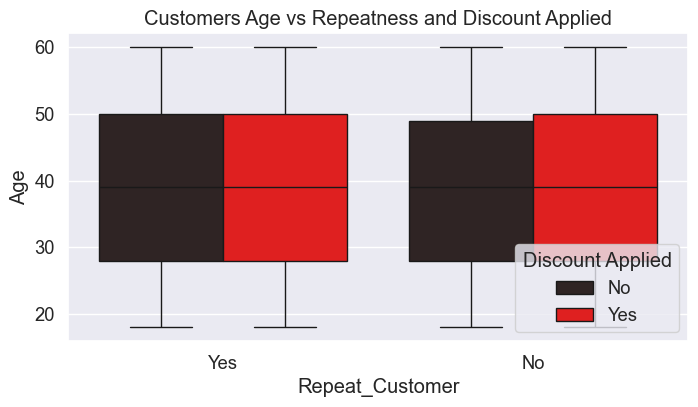

In [395]:
sns.boxplot(data=df,x='Repeat_Customer',y='Age',
    hue='Discount_Applied',palette='dark:red')
plt.legend(title="Discount Applied",loc='lower right')
plt.title("Customers Age vs Repeatness and Discount Applied")
plt.show()

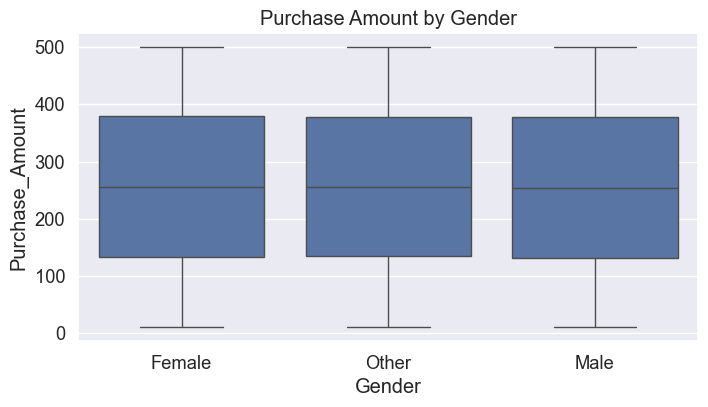

In [396]:
sns.boxplot(data=df, x='Gender', y='Purchase_Amount')
plt.title('Purchase Amount by Gender')
plt.show()

In [397]:
# top 5 cities by sales
top_5_cities_purchases = df.groupby('City')['Purchase_Amount'].sum().sort_values(ascending=False).head(5)

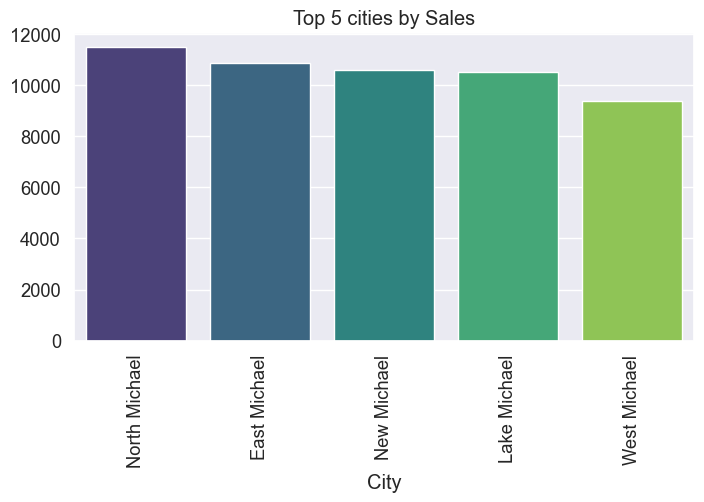

In [398]:
# plot for top 5 cities by sales
sns.barplot(
    x=top_5_cities_purchases.index,
    y=top_5_cities_purchases.values,
    order=top_5_cities_purchases.index,
    hue=top_5_cities_purchases.index,
    palette='viridis')
plt.title("Top 5 cities by Sales")
plt.xticks(rotation=90)
plt.show()

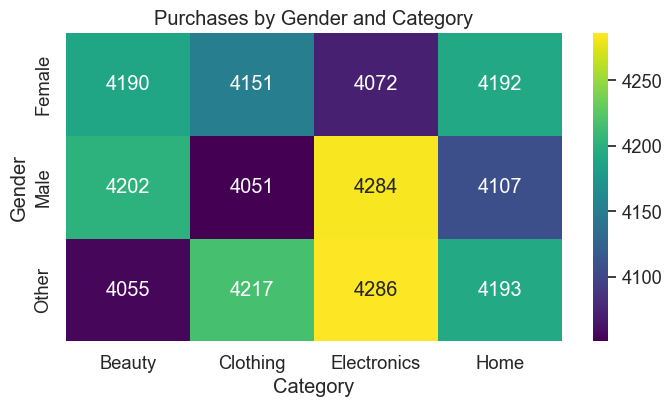

In [399]:
cross = pd.crosstab(df['Gender'], df['Category'])
sns.heatmap(cross, annot=True, cmap='viridis',fmt='.0f')
plt.title("Purchases by Gender and Category")
plt.show()

In [400]:
# Total Sales By Category
sales_category = df.groupby('Category')['Purchase_Amount'].sum()


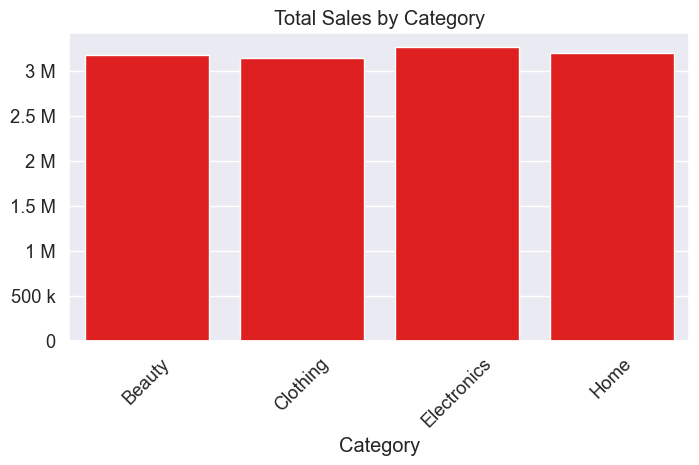

In [401]:
ax = sns.barplot(x=sales_category.index,y=sales_category.values,color='red')
ax.yaxis.set_major_formatter(ticker.EngFormatter())
plt.title("Total Sales by Category")
plt.xticks(rotation=45)
plt.show()

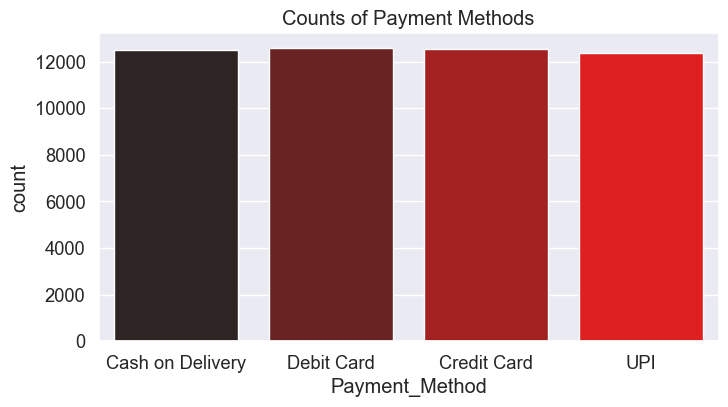

In [402]:
sns.countplot(
    data=df,
    x='Payment_Method',
    palette='dark:red',
    hue='Payment_Method')
plt.title("Counts of Payment Methods")
plt.show()

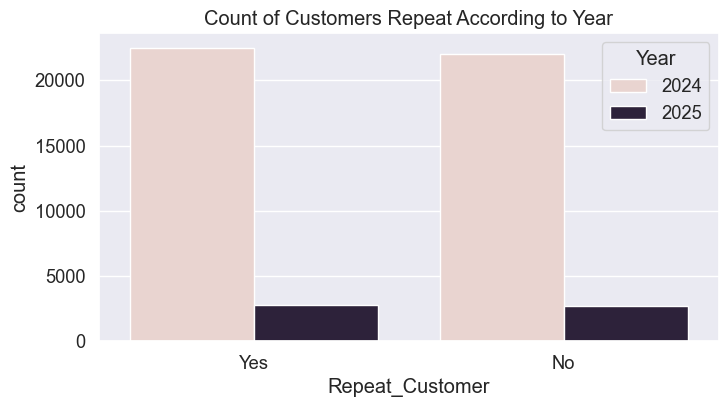

In [403]:
sns.countplot(data=df, x='Repeat_Customer',hue='Year')
plt.title("Count of Customers Repeat According to Year")
plt.show()

In [404]:
monthly_sales = df.groupby('Month')['Purchase_Amount'].sum().reset_index()
monthly_sales = pd.DataFrame(monthly_sales)
monthly_sales.columns = ['Month','Sales']

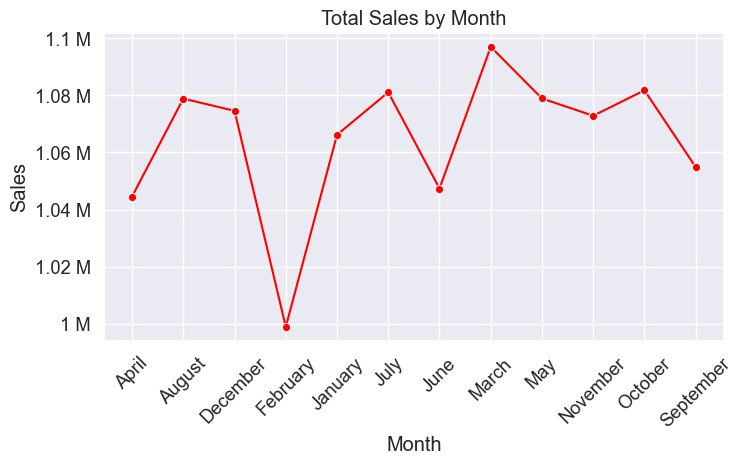

In [405]:

ax = sns.lineplot(
    data=monthly_sales,
    x='Month',
    y='Sales',
    marker='o',
    color='red'
)
plt.title("Total Sales by Month")
ax.yaxis.set_major_formatter(ticker.EngFormatter(unit=''))
plt.xticks(rotation=45)
plt.show()

In [406]:
# top 10 product names
top_products = df.groupby('Product_Name')['Purchase_Amount'].sum().reset_index()

top_products = pd.DataFrame(top_products)
top_products.columns = ['Product','Sales']

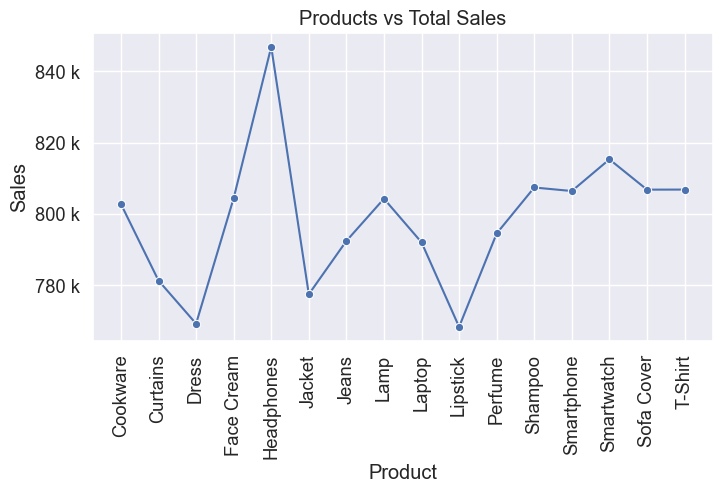

In [407]:
ax = sns.lineplot(
    data=top_products,
    x='Product',
    y='Sales',
    marker='o',
)
ax.yaxis.set_major_formatter(ticker.EngFormatter())
plt.title("Products vs Total Sales")
plt.xticks(rotation=90)
plt.show()

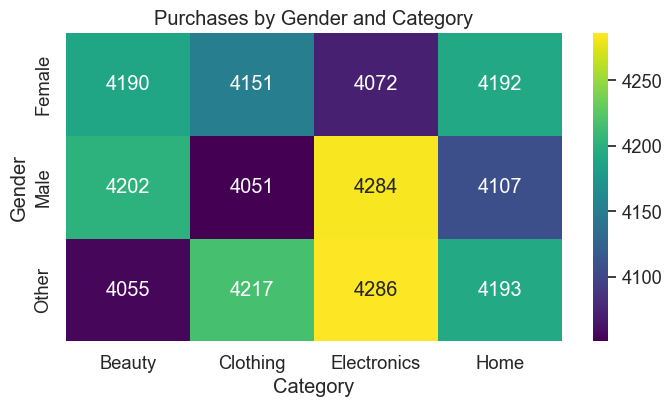

In [408]:
# making cross tabulation for comparing product categories
cross = pd.crosstab(df['Gender'], df['Category'])
sns.heatmap(cross, annot=True, cmap='viridis',fmt='.0f')
plt.title("Purchases by Gender and Category")
plt.show()

# 📊 **Key Insights**


---

### 🧍‍♂️ **1. Customer Demographics**

* 🧑🧓 Most customers are **between 28 to 50 years old**.
* 👨‍👩‍👧 Gender distribution: ~33% male, ~33% female, ~34% other genders.
* 🛍️ About **50% of purchases have discounts applied**, and **50% are repeat customers**.
* 📊 Indicates a **moderate spending pattern** among customers.

---

### 💰 **2. Purchase Amount Insights**

* 💵 Most purchases fall between **150 to 390**.
* 📊 Indicates a **moderate spending pattern** among customers.

---

### 🏙️ **3. City-wise Sales**

* 🥇 **North Michael** — **Highest total sales**
* 🥈 **West Michael** — **Lowest total sales**
* 🌍 Suggests **regional differences** in purchase behavior.

---

### 🧍‍♂️ **4. Gender vs Category**

* 👨 **Males** mostly buy **Beauty Products**.
* 👥 **Other genders** prefer **Clothing** and **Electronics**.
* 👩 **Females** and 👥 **Others** equally purchase **Home Products**.
* 🧩 Indicates **diverse category interests across genders**.

---

### 🛒 **5. Category-wise Sales**

* 💻 **Electronics** — **Highest overall sales**
* 👕 **Clothing** — **Lowest overall sales**
* 🏷️ Suggests **Electronics drive major revenue**.

---

### 💳 **6. Payment Method Insights**

* 🏦 **Debit Cards** — Most commonly used for payments
* 📱 **UPI** — Least preferred method
* 💡 Indicates customers favor **traditional banking methods**.

---

### 📆 **7. Yearly Sales**

* 📈 Most sales occurred in **2024**, showing a **strong performance year**.

---

### 🗓️ **8. Monthly Sales**

* 🌸 **March** — Peak sales month
* ❄️ **February** — Lowest sales month
* 📅 Reflects **seasonal or promotional influences**.

---

### 🎧 **9. Product-wise Performance**

* 🔊 **Headphones** — **Highest selling product**
* 💄 **Lipstick** and 👚 **Clothing** — **Lowest sales**
* 📦 Highlights **strong demand for tech accessories**.

---